In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
image_file = './images/room1.jpg'

In [9]:
def display_image(image):
    plt.figure()
    plt.imshow(image)
    plt.axis('off')

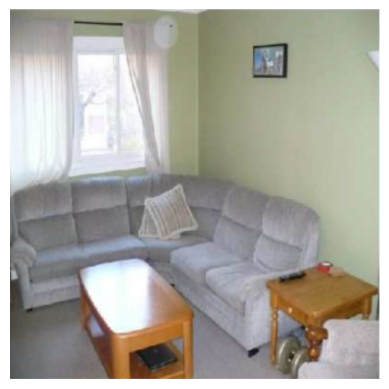

In [11]:
image = Image.open(image_file)
image = np.array(image)
image = image / 255

display_image(image)

True None


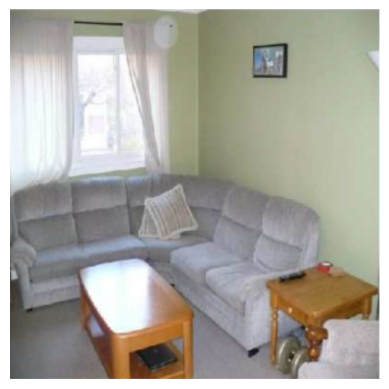

In [28]:
image_tensor = torch.tensor(image, requires_grad=True)
display_image(image_tensor.detach().numpy())
print(image_tensor.requires_grad, image_tensor.grad_fn)

True <FlipBackward0 object at 0x1774dee20>


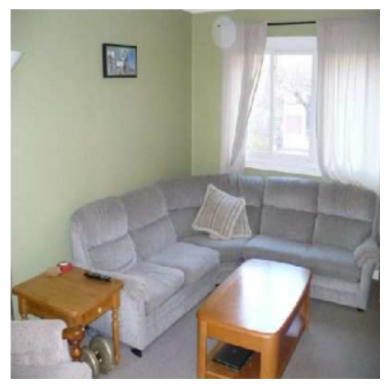

In [30]:
image_tensor_flipped = torch.flip(image_tensor, [1])
display_image(image_tensor_flipped.detach().numpy())
print(image_tensor_flipped.requires_grad, image_tensor_flipped.grad_fn)

In [34]:
help(torchvision.transforms.functional.rotate)

Help on function rotate in module torchvision.transforms.functional:

rotate(img: torch.Tensor, angle: float, interpolation: torchvision.transforms.functional.InterpolationMode = <InterpolationMode.NEAREST: 'nearest'>, expand: bool = False, center: Optional[List[int]] = None, fill: Optional[List[float]] = None) -> torch.Tensor
    Rotate the image by angle.
    If the image is torch Tensor, it is expected
    to have [..., H, W] shape, where ... means an arbitrary number of leading dimensions.
    
    Args:
        img (PIL Image or Tensor): image to be rotated.
        angle (number): rotation angle value in degrees, counter-clockwise.
        interpolation (InterpolationMode): Desired interpolation enum defined by
            :class:`torchvision.transforms.InterpolationMode`. Default is ``InterpolationMode.NEAREST``.
            If input is Tensor, only ``InterpolationMode.NEAREST``, ``InterpolationMode.BILINEAR`` are supported.
            The corresponding Pillow integer constants

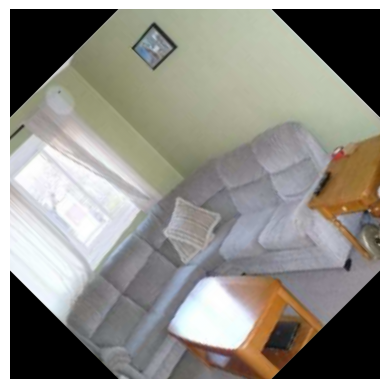

In [51]:
image_tensor_chw = image_tensor.permute((2, 0, 1)) # HWC -> CHW

image_tensor_rotated_chw = torchvision.transforms.functional.rotate(
    image_tensor_chw,
    angle=45
)

print(image_tensor_rotated_chw.grad_fn)

image_tensor_rotated = image_tensor_rotated_chw.permute((1, 2, 0)) # CHW -> HWC
display_image(image_tensor_rotated.detach().numpy())


print(image_tensor_rotated.grad_fn)

In [36]:
image_tensor.shape

torch.Size([854, 854, 3])

As we can see, input can be flipped and rotated using `torch` and `torchvision`, as well as these operations appear to be tracked.